In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
from sklearn.datasets import fetch_openml
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('weatherAUS.csv')
df = df.drop(columns=['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])
# for the columns with NaN values replace them with the mean
for col in df.columns:
    if df[col].dtype != 'object':
        df[col].fillna(value = df[col].mean(), inplace = True)
df.RainToday.replace(('Yes', 'No'), (1, 0), inplace=True)
df.RainTomorrow.replace(('Yes', 'No'), (1, 0), inplace=True)
df = df[df['RainToday'].notna()]
df = df[df['RainTomorrow'].notna()]
data = df.to_numpy()
y = data[:,-1]
X = data[:,:-1]
print(y.shape)
print(X.shape)
X_scale = preprocessing.scale(X)

(140787,)
(140787, 17)


<AxesSubplot:>

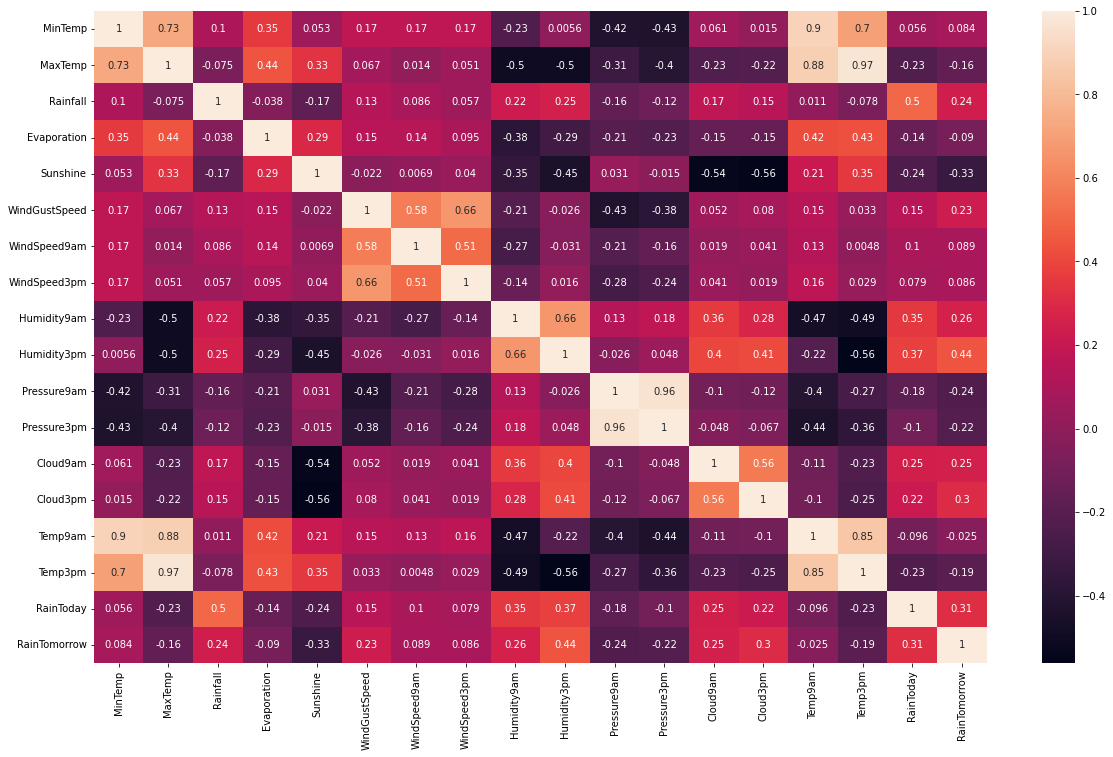

In [3]:
cor = df.corr()
plt.figure(figsize = (20, 12))
sns.heatmap(cor, annot = True)

In [4]:
related = cor['RainTomorrow'].sort_values(ascending = False)
print(related)

RainTomorrow     1.000000
Humidity3pm      0.441541
RainToday        0.313097
Cloud3pm         0.303381
Humidity9am      0.256052
Cloud9am         0.254208
Rainfall         0.239032
WindGustSpeed    0.225622
WindSpeed9am     0.089463
WindSpeed3pm     0.085906
MinTemp          0.084179
Temp9am         -0.025371
Evaporation     -0.089966
MaxTemp         -0.159269
Temp3pm         -0.190702
Pressure3pm     -0.216805
Pressure9am     -0.235940
Sunshine        -0.328782
Name: RainTomorrow, dtype: float64


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, random_state=42)
print('X_train:' + str(X_train.shape))
print('y_train:' + str(y_train.shape))
print('X_test: '  + str(X_test.shape))
print('y_test: '  + str(y_test.shape))
Cs = [0.01, 0.1, 1, 10]
kernels = ['linear', 'poly', 'rbf']

X_train:(105590, 17)
y_train:(105590,)
X_test: (35197, 17)
y_test: (35197,)


In [6]:
svm_linear_c0 = svm_clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel=kernels[0], C=Cs[0]))
svm_linear_c0.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.01, gamma='auto', kernel='linear'))])

In [7]:
svm_linear_c0_trainScore = svm_linear_c0.score(X_train, y_train)
svm_linear_c0_testScore = svm_linear_c0.score(X_test, y_test)
print(svm_linear_c0_trainScore)
print(svm_linear_c0_testScore)

0.845259967799981
0.8424865755604171


In [8]:
svm_linear_c1 = svm_clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel=kernels[0], C=Cs[1]))
svm_linear_c1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.1, gamma='auto', kernel='linear'))])

In [9]:
svm_linear_c1_trainScore = svm_linear_c1.score(X_train, y_train)
svm_linear_c1_testScore = svm_linear_c1.score(X_test, y_test)
print(svm_linear_c1_trainScore)
print(svm_linear_c1_testScore)

0.8450989677052752
0.8424865755604171


In [10]:
svm_linear_c2 = svm_clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel=kernels[0], C=Cs[2]))
svm_linear_c2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, gamma='auto', kernel='linear'))])

In [11]:
svm_linear_c2_trainScore = svm_linear_c2.score(X_train, y_train)
svm_linear_c2_testScore = svm_linear_c2.score(X_test, y_test)
print(svm_linear_c2_trainScore)
print(svm_linear_c2_testScore)

0.845051614736244
0.8425718100974515


In [12]:
svm_linear_c3 = svm_clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel=kernels[0], C=Cs[3]))
svm_linear_c3.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=10, gamma='auto', kernel='linear'))])

In [13]:
svm_linear_c3_trainScore = svm_linear_c3.score(X_train, y_train)
svm_linear_c3_testScore = svm_linear_c3.score(X_test, y_test)
print(svm_linear_c3_trainScore)
print(svm_linear_c3_testScore)

0.8450610853300502
0.8425149870727618


In [14]:
svm_poly_c0 = svm_clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel=kernels[1], C=Cs[0]))
svm_poly_c0.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.01, gamma='auto', kernel='poly'))])

In [15]:
svm_poly_c0_trainScore = svm_poly_c0.score(X_train, y_train)
svm_poly_c0_testScore = svm_poly_c0.score(X_test, y_test)
print(svm_poly_c0_trainScore)
print(svm_poly_c0_testScore)

0.835240079552988
0.8339631218569764


In [16]:
svm_poly_c1 = svm_clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel=kernels[1], C=Cs[1]))
svm_poly_c1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.1, gamma='auto', kernel='poly'))])

In [17]:
svm_poly_c1_trainScore = svm_poly_c1.score(X_train, y_train)
svm_poly_c1_testScore = svm_poly_c1.score(X_test, y_test)
print(svm_poly_c1_trainScore)
print(svm_poly_c1_testScore)

0.8460270858982858
0.8428843367332444


In [18]:
svm_poly_c2 = svm_clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel=kernels[1], C=Cs[2]))
svm_poly_c2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, gamma='auto', kernel='poly'))])

In [19]:
svm_poly_c2_trainScore = svm_poly_c2.score(X_train, y_train)
svm_poly_c2_testScore = svm_poly_c2.score(X_test, y_test)
print(svm_poly_c2_trainScore)
print(svm_poly_c2_testScore)

0.8515673832749313
0.8463505412393102


In [20]:
svm_poly_c3 = svm_clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel=kernels[1], C=Cs[3]))
svm_poly_c3.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=10, gamma='auto', kernel='poly'))])

In [21]:
svm_poly_c3_trainScore = svm_poly_c3.score(X_train, y_train)
svm_poly_c3_testScore = svm_poly_c3.score(X_test, y_test)
print(svm_poly_c3_trainScore)
print(svm_poly_c3_testScore)

0.8536982668813334
0.8477711168565503


In [22]:
svm_rbf_c0 = svm_clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel=kernels[2], C=Cs[0]))
svm_rbf_c0.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.01, gamma='auto'))])

In [23]:
svm_rbf_c0_trainScore = svm_rbf_c0.score(X_train, y_train)
svm_rbf_c0_testScore = svm_rbf_c0.score(X_test, y_test)
print(svm_rbf_c0_trainScore)
print(svm_rbf_c0_testScore)

0.8411592006818828
0.8399011279370401


In [24]:
svm_rbf_c1 = svm_clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel=kernels[2], C=Cs[1]))
svm_rbf_c1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.1, gamma='auto'))])

In [25]:
svm_rbf_c1_trainScore = svm_rbf_c1.score(X_train, y_train)
svm_rbf_c1_testScore = svm_rbf_c1.score(X_test, y_test)
print(svm_rbf_c1_trainScore)
print(svm_rbf_c1_testScore)

0.850857088739464
0.8466914793874478


In [26]:
svm_rbf_c2 = svm_clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel=kernels[2], C=Cs[2]))
svm_rbf_c2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, gamma='auto'))])

In [27]:
svm_rbf_c2_trainScore = svm_rbf_c2.score(X_train, y_train)
svm_rbf_c2_testScore = svm_rbf_c2.score(X_test, y_test)
print(svm_rbf_c2_trainScore)
print(svm_rbf_c2_testScore)

0.8593332701960413
0.8509532062391681


In [28]:
svm_rbf_c3 = svm_clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel=kernels[2], C=Cs[3]))
svm_rbf_c3.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=10, gamma='auto'))])

In [29]:
svm_rbf_c3_trainScore = svm_rbf_c3.score(X_train, y_train)
svm_rbf_c3_testScore = svm_rbf_c3.score(X_test, y_test)
print(svm_rbf_c3_trainScore)
print(svm_rbf_c3_testScore)

0.8719859835211667
0.8520612552206154


In [30]:
svm_linear_trainScores = [svm_linear_c0_trainScore, svm_linear_c1_trainScore, svm_linear_c2_trainScore, svm_linear_c3_trainScore]
svm_linear_testScores = [svm_linear_c0_testScore, svm_linear_c1_testScore, svm_linear_c2_testScore, svm_linear_c3_testScore]
svm_poly_trainScores = [svm_poly_c0_trainScore, svm_poly_c1_trainScore, svm_poly_c2_trainScore, svm_poly_c3_trainScore]
svm_poly_testScores = [svm_poly_c0_testScore, svm_poly_c1_testScore, svm_poly_c2_testScore, svm_poly_c3_testScore]
svm_rbf_trainScores = [svm_rbf_c0_trainScore, svm_rbf_c1_trainScore, svm_rbf_c2_trainScore, svm_rbf_c3_trainScore]
svm_rbf_testScores = [svm_rbf_c0_testScore, svm_rbf_c1_testScore, svm_rbf_c2_testScore, svm_rbf_c3_testScore]
print(svm_linear_trainScores)
print(svm_linear_testScores)
print(svm_poly_trainScores)
print(svm_poly_testScores)
print(svm_rbf_trainScores)
print(svm_rbf_testScores)


[0.845259967799981, 0.8450989677052752, 0.845051614736244, 0.8450610853300502]
[0.8424865755604171, 0.8424865755604171, 0.8425718100974515, 0.8425149870727618]
[0.835240079552988, 0.8460270858982858, 0.8515673832749313, 0.8536982668813334]
[0.8339631218569764, 0.8428843367332444, 0.8463505412393102, 0.8477711168565503]
[0.8411592006818828, 0.850857088739464, 0.8593332701960413, 0.8719859835211667]
[0.8399011279370401, 0.8466914793874478, 0.8509532062391681, 0.8520612552206154]


Text(0, 0.5, 'Accuracy')

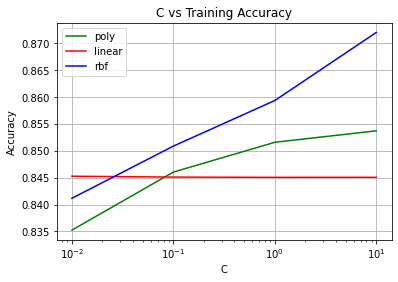

In [31]:
plt.plot(Cs, svm_poly_trainScores, color = 'g', label = 'poly')
plt.plot(Cs, svm_linear_trainScores, color = 'r', label = 'linear')
plt.plot(Cs, svm_rbf_trainScores, color = 'b', label = 'rbf')
plt.xscale('log')
plt.grid()
plt.legend(loc='best')
plt.title('C vs Training Accuracy')
plt.xlabel('C')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

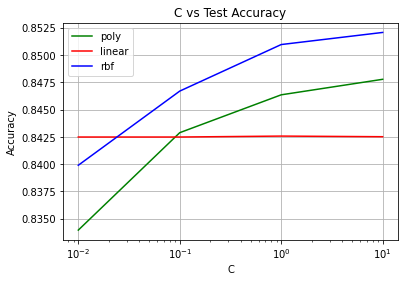

In [32]:
plt.plot(Cs, svm_poly_testScores, color = 'g', label = 'poly')
plt.plot(Cs, svm_linear_testScores, color = 'r', label = 'linear')
plt.plot(Cs, svm_rbf_testScores, color = 'b', label = 'rbf')
plt.xscale('log')
plt.grid()
plt.legend(loc='best')
plt.title('C vs Test Accuracy')
plt.xlabel('C')
plt.ylabel('Accuracy')

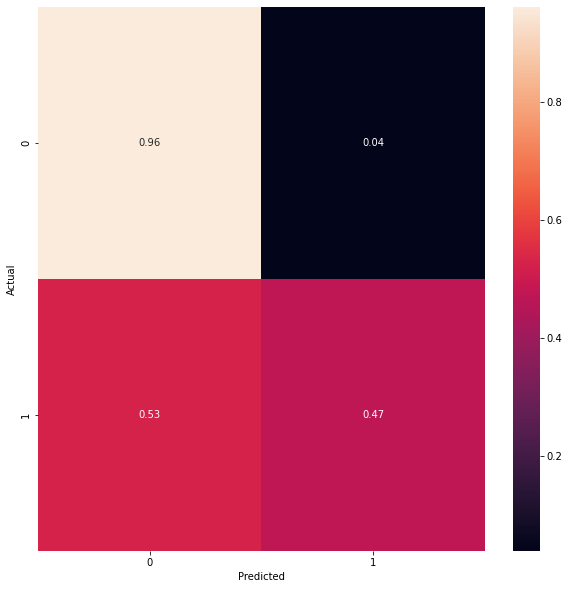

In [33]:
y_pred = svm_rbf_c3.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)